In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

# Import data

In [2]:
# def get_data(week_nums):
#     url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
#     dfs = []
#     for week_num in week_nums: #for each week
#         file_url = url.format(week_num) #format the url so it grabs that week
#         dfs.append(pd.read_csv(file_url)) #append to our empty list
#     return pd.concat(dfs) #combine files for each week
        
# week_nums = [200307, 200314, 200321, 200328, 200404, 200411, 200418, 200425, 200502, 200509, 200516, 200523, 200530]
# turnstiles_df = get_data(week_nums)

In [3]:
# turnstiles_df.to_csv('mta_data_all.csv', header = False, index = False)

In [4]:
engine = create_engine("sqlite:///mta.db")

# Create dataframes

#### Create dataframe of mta data table from mta database

In [5]:
mta_data_df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [6]:
mta_data_df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058


#### Create dataframe of stations & corresponding zip codes from station_zips table in mta database

In [7]:
station_zips_df = pd.read_sql('SELECT * FROM station_zips;', engine)
station_zips_df.head()

,STATION,LINENAME,ZIP
0,1 AV,L,10003
1,103 ST,BC,10025
2,103 ST,1,10025
3,103 ST,6,10029
4,103 ST-CORONA,7,11368


#### Create dataframe of zip codes & corresponding median incomes from zips_income table in mta database

In [8]:
zips_income_df = pd.read_sql('SELECT * FROM zips_income;', engine)
zips_income_df.head()

,ZIP,MEDIAN_INCOME
0,01001,56663
1,01002,49853
2,01003,28462
3,01005,75423
4,01007,79076


In [9]:
zips_income_df.MEDIAN_INCOME.describe()
# descriptive statistics for median incomes in entire dataset (for entire nation, not only NY/NYC)

count     32634.000000
mean      50938.205246
std       20356.272305
min          33.000000
25%       38462.000000
50%       46503.500000
75%       58255.500000
max      223106.000000
Name: MEDIAN_INCOME, dtype: float64

#### Create master dataframe with all columns/information using LEFT JOINS

In [10]:
# Join multiple (3 above) tables to get mta data, zip codes, and median income in one master dataframe

# Query using LEFT JOIN twice:

# SELECT m.STATION, m.LINENAME, z.ZIP, i.MEDIAN_INCOME, m.CA, m.UNIT, m.SCP, m.DIVISION, m.DATE, m.time, m.DESC, m.ENTRIES, m.EXITS
# FROM station_zips z
#     LEFT JOIN mta_data m ON z.STATION = m.STATION AND z.LINENAME = m.LINENAME
#     LEFT JOIN zips_income i ON z.ZIP = i.ZIP

    
master_mta_df = pd.read_sql('SELECT m.STATION, m.LINENAME, z.ZIP, i.MEDIAN_INCOME, m.CA, m.UNIT, m.SCP, m.DIVISION, m.DATE, m.time, m.DESC, m.ENTRIES, m.EXITS FROM station_zips z LEFT JOIN mta_data m ON z.STATION = m.STATION AND z.LINENAME = m.LINENAME LEFT JOIN zips_income i ON z.ZIP = i.ZIP', engine)

In [11]:
master_mta_df.head()

,STATION,LINENAME,ZIP,MEDIAN_INCOME,CA,UNIT,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,03:00:00,REGULAR,15455022,17292624
1,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,07:00:00,REGULAR,15455022,17292624
2,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,11:00:00,REGULAR,15455022,17292624
3,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,15:00:00,REGULAR,15455022,17292624
4,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,19:00:00,REGULAR,15455022,17292624


In [12]:
master_mta_df.tail()

,STATION,LINENAME,ZIP,MEDIAN_INCOME,CA,UNIT,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2685521,ZEREGA AV,6,10461,47716,R419,R326,00-05-01,IRT,05/29/2020,05:00:00,REGULAR,39,164
2685522,ZEREGA AV,6,10461,47716,R419,R326,00-05-01,IRT,05/29/2020,09:00:00,REGULAR,39,164
2685523,ZEREGA AV,6,10461,47716,R419,R326,00-05-01,IRT,05/29/2020,13:00:00,REGULAR,39,164
2685524,ZEREGA AV,6,10461,47716,R419,R326,00-05-01,IRT,05/29/2020,17:00:00,REGULAR,39,164
2685525,ZEREGA AV,6,10461,47716,R419,R326,00-05-01,IRT,05/29/2020,21:00:00,REGULAR,39,164


In [13]:
master_mta_df.columns
# no need to strip white space from column names

Index(['STATION', 'LINENAME', 'ZIP', 'MEDIAN_INCOME', 'CA', 'UNIT', 'SCP',
       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [14]:
master_mta_df.MEDIAN_INCOME.describe()
# includes duplicates of median incomes since zip code (and thus median income) are shared by many stations
# max median income: $1,454,590
# mean median income: ~$65,115
# min median income: $14,570
# 50th percentile median income: $55,983

# all seems reasonable

count    2.685526e+06
mean     6.511515e+04
std      3.160311e+04
min      1.457000e+04
25%      3.855000e+04
50%      5.598300e+04
75%      9.217500e+04
max      1.454590e+05
Name: MEDIAN_INCOME, dtype: float64

In [15]:
master_mta_df.DATE.value_counts().sort_index()
# first week of march 2020 through last week of may 2020

02/29/2020    29349
03/01/2020    29531
03/02/2020    29864
03/03/2020    29388
03/04/2020    29653
              ...  
05/25/2020    30166
05/26/2020    30697
05/27/2020    30339
05/28/2020    29902
05/29/2020    30323
Name: DATE, Length: 91, dtype: int64

# Convert to time series

In [16]:
import datetime
from datetime import datetime as dt

In [17]:
master_mta_df['DATE_TIME'] = pd.to_datetime(master_mta_df.DATE + " " + master_mta_df.TIME, format = "%m/%d/%Y %H:%M:%S")

In [18]:
master_mta_df.head()

,STATION,LINENAME,ZIP,MEDIAN_INCOME,CA,UNIT,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,03:00:00,REGULAR,15455022,17292624,2020-02-29 03:00:00
1,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,07:00:00,REGULAR,15455022,17292624,2020-02-29 07:00:00
2,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,11:00:00,REGULAR,15455022,17292624,2020-02-29 11:00:00
3,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,15:00:00,REGULAR,15455022,17292624,2020-02-29 15:00:00
4,1 AV,L,10003,89999,H007,R248,00-00-00,BMT,02/29/2020,19:00:00,REGULAR,15455022,17292624,2020-02-29 19:00:00


In [19]:
master_mta_df.describe()

,MEDIAN_INCOME,ENTRIES,EXITS
count,2.685526e+06,2.685526e+06,2.685526e+06
mean,6.511515e+04,4.328774e+07,3.545910e+07
std,3.160311e+04,2.201133e+08,1.995719e+08
min,1.457000e+04,0.000000e+00,0.000000e+00
25%,3.855000e+04,3.115810e+05,1.388080e+05
50%,5.598300e+04,1.884030e+06,1.090119e+06
75%,9.217500e+04,6.504447e+06,4.428336e+06
max,1.454590e+05,2.128786e+09,2.123351e+09


In [20]:
# check for missing values
master_mta_df.isnull().sum().sum()

0

In [21]:
# check for missing values
master_mta_df.isna().sum()

STATION          0
LINENAME         0
ZIP              0
MEDIAN_INCOME    0
CA               0
UNIT             0
SCP              0
DIVISION         0
DATE             0
TIME             0
DESC             0
ENTRIES          0
EXITS            0
DATE_TIME        0
dtype: int64

In [22]:
master_mta_df.DESC.value_counts()

REGULAR       2676064
RECOVR AUD       9462
Name: DESC, dtype: int64

In [23]:
# observe one specific turnstile
mask = ((master_mta_df["CA"] == "A002") & (master_mta_df["UNIT"] == "R051") & (master_mta_df["SCP"] == "02-00-00") & (master_mta_df["STATION"] == "59 ST"))

master_mta_df[mask].head()

,STATION,LINENAME,ZIP,MEDIAN_INCOME,CA,UNIT,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
725087,59 ST,NQR456W,10022,93107,A002,R051,02-00-00,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844,2020-02-29 03:00:00
725088,59 ST,NQR456W,10022,93107,A002,R051,02-00-00,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857,2020-02-29 07:00:00
725089,59 ST,NQR456W,10022,93107,A002,R051,02-00-00,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945,2020-02-29 11:00:00
725090,59 ST,NQR456W,10022,93107,A002,R051,02-00-00,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013,2020-02-29 15:00:00
725091,59 ST,NQR456W,10022,93107,A002,R051,02-00-00,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058,2020-02-29 19:00:00


In [24]:
# Sanity Check to verify that "CA", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(master_mta_df
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
426632,H009,R235,00-03-00,BEDFORD AV,2020-03-22 12:00:00,2
504107,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
863197,N120A,R153,01-00-00,UTICA AV,2020-04-17 05:00:00,2
0,A002,R051,02-00-00,59 ST,2020-02-29 03:00:00,1
1790348,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 16:00:00,1


In [25]:
# seem to have two records for same time on 3/22/20, 5/27,20, 4/17/20
mask = ((master_mta_df["CA"] == "H009") & 
(master_mta_df["UNIT"] == "R235") & 
(master_mta_df["SCP"] == "00-03-00") & 
(master_mta_df["STATION"] == "BEDFORD AV") &
(master_mta_df["DATE_TIME"].dt.date == datetime.datetime(2020, 3, 22).date()))

master_mta_df[mask].head()

,STATION,LINENAME,ZIP,MEDIAN_INCOME,CA,UNIT,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1168895,BEDFORD AV,L,11211,37632,H009,R235,00-03-00,BMT,03/22/2020,00:00:00,REGULAR,17126296,22672766,2020-03-22 00:00:00
1168896,BEDFORD AV,L,11211,37632,H009,R235,00-03-00,BMT,03/22/2020,04:00:00,REGULAR,17126296,22672770,2020-03-22 04:00:00
1168897,BEDFORD AV,L,11211,37632,H009,R235,00-03-00,BMT,03/22/2020,08:00:00,REGULAR,17126296,22672779,2020-03-22 08:00:00
1168898,BEDFORD AV,L,11211,37632,H009,R235,00-03-00,BMT,03/22/2020,12:00:00,RECOVR AUD,19676995,30044802,2020-03-22 12:00:00
1168899,BEDFORD AV,L,11211,37632,H009,R235,00-03-00,BMT,03/22/2020,12:00:00,REGULAR,17126296,22672798,2020-03-22 12:00:00


can see duplicate records on 3/22/20 at 12:00 due to recover aud

In [26]:
master_mta_df.DESC.value_counts()

REGULAR       2676064
RECOVR AUD       9462
Name: DESC, dtype: int64

In [27]:
# get rid of duplicate entries
master_mta_df.sort_values(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
master_mta_df.drop_duplicates(subset=["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [28]:
# Sanity Check to verify that "CA", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(master_mta_df
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-02-29 03:00:00,1
1790362,R141,R031,00-03-00,34 ST-PENN STA,2020-04-18 00:00:00,1
1790344,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 00:00:00,1
1790345,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 04:00:00,1
1790346,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 08:00:00,1


No more duplicate entries

In [29]:
master_mta_df.isnull().values.any()

False

In [30]:
master_mta_df.isnull().any().any()

False

In [31]:
master_mta_df.isnull().sum()
# makes sense that there are no null values because all stations had zips and all zips had median income

STATION          0
LINENAME         0
ZIP              0
MEDIAN_INCOME    0
CA               0
UNIT             0
SCP              0
DIVISION         0
DATE             0
TIME             0
DESC             0
ENTRIES          0
EXITS            0
DATE_TIME        0
dtype: int64

In [32]:
master_mta_df.isnull().sum().sum()

0

In [33]:
# Now, no more duplicate entries and no missing values

## Add extra column for income bracket so that data can be aggregated by income bracket

In [34]:
master_mta_df.MEDIAN_INCOME.describe()

count    2.685523e+06
mean     6.511519e+04
std      3.160311e+04
min      1.457000e+04
25%      3.855000e+04
50%      5.598300e+04
75%      9.217500e+04
max      1.454590e+05
Name: MEDIAN_INCOME, dtype: float64

### Explore relative distribution of the records with median incomes falling into different income brackets:

In [35]:
# < $25,000
# $25,000 <= median income < $50,000
# $50,000 <= median income < $75,000
# $75,000 <= median income < $100,000
# $100,000 <= median income < $200,000
# >= $200,000

In [36]:
# later if time permits, can create a new dataframe of master_mta_df grouped by station to see
# how many stations fall into each income bracket
# cannot figure out/get syntax correct for how to apply mask to a groupby object

#### Under $25,000

In [37]:
(master_mta_df['MEDIAN_INCOME'] < 25000).describe()

count     2685523
unique          2
top         False
freq      2571376
Name: MEDIAN_INCOME, dtype: object

In [38]:
(master_mta_df['MEDIAN_INCOME'] < 25000).value_counts()

False    2571376
True      114147
Name: MEDIAN_INCOME, dtype: int64

In [39]:
((master_mta_df['MEDIAN_INCOME']).where(master_mta_df['MEDIAN_INCOME'] < 25000)).value_counts()

22843.0    28838
22970.0    25581
22829.0    14196
18024.0    12558
23302.0    11973
14570.0     9256
23645.0     7934
21955.0     3811
Name: MEDIAN_INCOME, dtype: int64

#### $25,000 under 50,000

In [40]:
((25000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 50000)).value_counts()

False    1675847
True     1009676
Name: MEDIAN_INCOME, dtype: int64

In [41]:
((master_mta_df['MEDIAN_INCOME']).where((25000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 50000))).value_counts()

39955.0    64140
31137.0    39344
37632.0    35582
43963.0    33694
47496.0    28887
           ...  
37107.0     3811
28692.0     3271
40080.0     2179
47895.0     1638
25642.0     1623
Name: MEDIAN_INCOME, Length: 62, dtype: int64

#### $50,000 under 75,000

In [42]:
((50000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 75000)).value_counts()

False    2015742
True      669781
Name: MEDIAN_INCOME, dtype: int64

In [43]:
((master_mta_df['MEDIAN_INCOME']).where((50000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 75000))).value_counts()

71245.0    108934
62393.0     70699
55937.0     66078
69836.0     48938
72611.0     45965
50291.0     44692
65001.0     25604
69446.0     24103
56103.0     19110
56776.0     18000
55001.0     15775
50019.0     14978
61469.0     14688
54367.0     13647
52495.0     13095
56907.0     12212
52302.0     11480
57063.0     11448
56615.0     11427
55983.0     10947
50944.0      9818
55094.0      9414
73075.0      9271
70965.0      8696
59568.0      6752
54874.0      4368
54570.0      4355
61824.0      3822
57183.0      3818
55200.0      2745
53208.0      2726
56910.0      2176
Name: MEDIAN_INCOME, dtype: int64

#### $75,000 under 100,000

In [44]:
((75000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 100000)).value_counts()

False    2217581
True      467942
Name: MEDIAN_INCOME, dtype: int64

In [45]:
((master_mta_df['MEDIAN_INCOME']).where((75000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 100000))).value_counts()

92359.0    72914
92175.0    71707
84786.0    67249
93107.0    56300
89999.0    45989
81317.0    25034
98450.0    24426
81331.0    22419
96760.0    22362
93702.0    21231
76967.0    21225
84276.0     8888
75157.0     8198
Name: MEDIAN_INCOME, dtype: int64

#### $100,000 under 200,000

In [46]:
((100000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 200000)).value_counts()

False    2261546
True      423977
Name: MEDIAN_INCOME, dtype: int64

In [47]:
((master_mta_df['MEDIAN_INCOME']).where((100000 <= master_mta_df['MEDIAN_INCOME']) & (master_mta_df['MEDIAN_INCOME'] < 200000))).value_counts()

145459.0    108989
108286.0     58327
102524.0     41120
110184.0     36403
111220.0     25498
110999.0     24900
105456.0     21249
113846.0     19658
115133.0     18498
113800.0     16910
131616.0     14029
108155.0     10363
105187.0      8757
112268.0      8191
102486.0      6558
107673.0      4527
Name: MEDIAN_INCOME, dtype: int64

#### $200,000 or more (none)

In [48]:
(master_mta_df['MEDIAN_INCOME'] > 200000).value_counts()
# no median incomes in set are over 200,000
# adjust last median income range to be "$100,000 or more" rather than "$200,000 or more"

False    2685523
Name: MEDIAN_INCOME, dtype: int64

In [49]:
(master_mta_df['MEDIAN_INCOME'] > 150000).value_counts()
# no median incomes in set even greater than 150,000
# reasonable as median is robust to outliers (such as really high 7-figure incomes)

False    2685523
Name: MEDIAN_INCOME, dtype: int64

In [50]:
def get_income_bracket(income):
    if income < 25000:
        return "1 under 25,000"
    elif income >= 25000 and income < 50000:
        return "25,000 under 50,000"
    elif income >= 50000 and income < 75000:
        return "50,000 under 75,000"
    elif income >= 75000 and income < 100000:
        return "75,000 under 100,000"
    elif income >= 100000:
        return "100,000 or more"
    
# was giving funky formatting (dollar sign disappeared, "under" italicized, no spacing)
# before when '$' was in string

In [51]:
# test function with values and edge conditions
# get_income_bracket(225345345)

In [52]:
master_mta_df['INCOME_BRACKET'] = master_mta_df.MEDIAN_INCOME.apply(get_income_bracket)

In [53]:
master_mta_df.head()

,STATION,LINENAME,ZIP,MEDIAN_INCOME,CA,UNIT,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,INCOME_BRACKET
2389937,RIT-ROOSEVELT,R,10044,102486,TRAM2,R469,00-05-01,RIT,05/29/2020,21:00:00,REGULAR,5554,514,2020-05-29 21:00:00,"100,000 or more"
2389936,RIT-ROOSEVELT,R,10044,102486,TRAM2,R469,00-05-01,RIT,05/29/2020,17:00:00,REGULAR,5554,514,2020-05-29 17:00:00,"100,000 or more"
2389935,RIT-ROOSEVELT,R,10044,102486,TRAM2,R469,00-05-01,RIT,05/29/2020,13:00:00,REGULAR,5554,514,2020-05-29 13:00:00,"100,000 or more"
2389934,RIT-ROOSEVELT,R,10044,102486,TRAM2,R469,00-05-01,RIT,05/29/2020,09:00:00,REGULAR,5554,514,2020-05-29 09:00:00,"100,000 or more"
2389933,RIT-ROOSEVELT,R,10044,102486,TRAM2,R469,00-05-01,RIT,05/29/2020,05:00:00,REGULAR,5554,514,2020-05-29 05:00:00,"100,000 or more"


In [54]:
master_mta_df.INCOME_BRACKET.value_counts()

25,000 under 50,000     1009676
50,000 under 75,000      669781
75,000 under 100,000     467942
100,000 or more          423977
1 under 25,000           114147
Name: INCOME_BRACKET, dtype: int64

#### Number of stations falling under each income bracket

In [55]:
master_mta_df.groupby(["INCOME_BRACKET"]).STATION.nunique()
# can see greatest number of stations in $25,000-50,000 range
# this was seen above as well when exploring the number of records for this income bracket

INCOME_BRACKET
1 under 25,000           24
100,000 or more          33
25,000 under 50,000     217
50,000 under 75,000      80
75,000 under 100,000     52
Name: STATION, dtype: int64

In [56]:
# try to change income bracket column to string or object instead of number
# master_mta_df['INCOME_BRACKET']= master_mta_df['INCOME_BRACKET'].astype(str)

In [57]:
master_mta_df.INCOME_BRACKET.value_counts()
# this cell's output and above cell's output indicate that the income ranges with least to highest number of stations
# are $1-25K, $100K+, $75K-100K, $50-75K, $25-50K

25,000 under 50,000     1009676
50,000 under 75,000      669781
75,000 under 100,000     467942
100,000 or more          423977
1 under 25,000           114147
Name: INCOME_BRACKET, dtype: int64

# Daily entries

In [58]:
# master_mta_daily = (master_mta_df
#                         .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
#                         .ENTRIES.first())

mta_daily_df = master_mta_df.groupby(["CA", "UNIT", "SCP", "STATION", "DATE", "INCOME_BRACKET"],as_index=False).ENTRIES.first()

In [59]:
mta_daily_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES
0,A002,R051,02-00-00,59 ST,02/29/2020,"75,000 under 100,000",7395518
1,A002,R051,02-00-00,59 ST,03/01/2020,"75,000 under 100,000",7396077
2,A002,R051,02-00-00,59 ST,03/02/2020,"75,000 under 100,000",7397350
3,A002,R051,02-00-00,59 ST,03/03/2020,"75,000 under 100,000",7398638
4,A002,R051,02-00-00,59 ST,03/04/2020,"75,000 under 100,000",7399918


In [60]:
mta_daily_df[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily_df
                                                       .groupby(["CA", "UNIT", "SCP", "STATION", "INCOME_BRACKET"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [61]:
mta_daily_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,02/29/2020,"75,000 under 100,000",7395518,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/01/2020,"75,000 under 100,000",7396077,02/29/2020,7395518.0
2,A002,R051,02-00-00,59 ST,03/02/2020,"75,000 under 100,000",7397350,03/01/2020,7396077.0
3,A002,R051,02-00-00,59 ST,03/03/2020,"75,000 under 100,000",7398638,03/02/2020,7397350.0
4,A002,R051,02-00-00,59 ST,03/04/2020,"75,000 under 100,000",7399918,03/03/2020,7398638.0


In [62]:
mta_daily_df.tail()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES
448032,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/25/2020,"100,000 or more",5554,05/24/2020,5554.0
448033,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/26/2020,"100,000 or more",5554,05/25/2020,5554.0
448034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2020,"100,000 or more",5554,05/26/2020,5554.0
448035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/28/2020,"100,000 or more",5554,05/27/2020,5554.0
448036,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/29/2020,"100,000 or more",5554,05/28/2020,5554.0


In [63]:
# Drop the rows for the earliest date in the df
mta_daily_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [64]:
mta_daily_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,03/01/2020,"75,000 under 100,000",7396077,02/29/2020,7395518.0
2,A002,R051,02-00-00,59 ST,03/02/2020,"75,000 under 100,000",7397350,03/01/2020,7396077.0
3,A002,R051,02-00-00,59 ST,03/03/2020,"75,000 under 100,000",7398638,03/02/2020,7397350.0
4,A002,R051,02-00-00,59 ST,03/04/2020,"75,000 under 100,000",7399918,03/03/2020,7398638.0
5,A002,R051,02-00-00,59 ST,03/05/2020,"75,000 under 100,000",7401196,03/04/2020,7399918.0


In [65]:
(mta_daily_df["ENTRIES"] - mta_daily_df["PREV_ENTRIES"]).describe()
# should have positive daily entries and nothing unreasonably large
# there are negative values as indicated by the huge difference between the max and the 75% percentile

count    4.430580e+05
mean     2.304234e+03
std      5.681541e+06
min     -1.562921e+09
25%      1.800000e+01
50%      7.700000e+01
75%      2.200000e+02
max      2.038597e+09
dtype: float64

In [66]:
# how many rows showed backwards turnstile counting
mta_daily_df[mta_daily_df["ENTRIES"] < mta_daily_df["PREV_ENTRIES"]].shape

(4041, 9)

In [67]:
mta_daily_df[mta_daily_df["ENTRIES"] < mta_daily_df["PREV_ENTRIES"]].head()
# entries as low as 4 and as high as 885 million seem unreasonable

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES
1469,A006,R079,00-00-04,5 AV/59 ST,04/13/2020,"100,000 or more",22,04/12/2020,7896791.0
1526,A006,R079,00-03-00,5 AV/59 ST,03/10/2020,"100,000 or more",60,03/09/2020,9437429.0
2282,A007,R079,01-06-03,5 AV/59 ST,04/07/2020,"100,000 or more",4,04/06/2020,7832194.0
3519,A011,R080,01-03-00,57 ST-7 AV,03/01/2020,"75,000 under 100,000",885683446,02/29/2020,885683787.0
3520,A011,R080,01-03-00,57 ST-7 AV,03/02/2020,"75,000 under 100,000",885682382,03/01/2020,885683446.0


In [68]:
# observe one turnstile-day where entries < prev_entries
mask = ((master_mta_df["CA"] == "A011") & 
(master_mta_df["UNIT"] == "R080") & 
(master_mta_df["SCP"] == "01-03-00") & 
(master_mta_df["STATION"] == "57 ST-7 AV") &
(master_mta_df["DATE_TIME"].dt.date == datetime.date(2020, 3, 1)))

In [69]:
master_mta_df[mask].sort_values('DATE_TIME')[['DATE', 'TIME', 'ENTRIES', 'EXITS']]

,DATE,TIME,ENTRIES,EXITS
721307,03/01/2020,03:00:00,885683750,489894452
721308,03/01/2020,07:00:00,885683744,489894404
721309,03/01/2020,11:00:00,885683718,489894179
721310,03/01/2020,15:00:00,885683650,489893897
721311,03/01/2020,19:00:00,885683507,489893698
721312,03/01/2020,23:00:00,885683446,489893566


In [70]:
# can see that counter is working in reverse for ENTRIES and EXITS
# how many stations have this problem
(mta_daily_df[mta_daily_df["ENTRIES"] < mta_daily_df["PREV_ENTRIES"]]
    .groupby(["CA", "UNIT", "SCP", "STATION"])
    .size())

CA     UNIT  SCP       STATION        
A006   R079  00-00-04  5 AV/59 ST          1
             00-03-00  5 AV/59 ST          1
A007   R079  01-06-03  5 AV/59 ST          1
A011   R080  01-03-00  57 ST-7 AV         90
             01-03-02  57 ST-7 AV          1
                                          ..
R610   R057  00-04-05  ATL AV-BARCLAY      1
R621   R060  00-05-01  EASTN PKWY-MUSM     1
R622   R123  00-00-00  FRANKLIN AV        70
R730   R431  00-00-04  EASTCHSTER/DYRE    89
TRAM1  R468  00-00-01  RIT-MANHATTAN       1
Length: 174, dtype: int64

#### Dealing with reversed counters

In [71]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

In [72]:
# deal with reverse counter for mta_daily_df
mta_daily_df["DAILY_ENTRIES"] = mta_daily_df.apply(get_daily_counts, axis=1, max_counter=750000)
#adjust max_counter from 1 million to 750,000 (that is how many people pass through grand central station, and 1/2 the population of Manhattan)

entries: 22 <-- 7896791.0
entries: 60 <-- 9437429.0
entries: 4 <-- 7832194.0
entries: 9 <-- 1562921334.0
entries: 6 <-- 6777428.0
entries: 36 <-- 5675074.0
entries: 34 <-- 999938.0
entries: 25 <-- 8800439.0
entries: 475957878 <-- 7480530.0
entries: 230 <-- 955727806.0
entries: 87 <-- 781103.0
entries: 15065838 <-- 17126282.0
entries: 25525735 <-- 15065804.0
entries: 12309516 <-- 25525671.0
entries: 72 <-- 1100765.0
entries: 20 <-- 2635368.0
entries: 95 <-- 3571824.0
entries: 18 <-- 168627933.0
entries: 51 <-- 4733633.0
entries: 51 <-- 841308.0
entries: 83886080 <-- 655360.0
entries: 2935583 <-- 81029.0
entries: 321184286 <-- 5646398.0
entries: 307624182 <-- 321184285.0
entries: 32 <-- 1317615.0
entries: 87 <-- 772840.0
entries: 95 <-- 2407240.0
entries: 56 <-- 1937131.0
entries: 8368358 <-- 1822637.0
entries: 577296 <-- 2819416.0
entries: 54 <-- 9046801.0
entries: 141 <-- 1516920.0
entries: 1627393907 <-- 6366854.0
entries: 57 <-- 1224795434.0
entries: 30 <-- 10444603.0
entries: 872 <-

In [73]:
mta_daily_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/01/2020,"75,000 under 100,000",7396077,02/29/2020,7395518.0,559.0
2,A002,R051,02-00-00,59 ST,03/02/2020,"75,000 under 100,000",7397350,03/01/2020,7396077.0,1273.0
3,A002,R051,02-00-00,59 ST,03/03/2020,"75,000 under 100,000",7398638,03/02/2020,7397350.0,1288.0
4,A002,R051,02-00-00,59 ST,03/04/2020,"75,000 under 100,000",7399918,03/03/2020,7398638.0,1280.0
5,A002,R051,02-00-00,59 ST,03/05/2020,"75,000 under 100,000",7401196,03/04/2020,7399918.0,1278.0


In [74]:
mta_daily_df.INCOME_BRACKET.value_counts()

25,000 under 50,000     166368
50,000 under 75,000     110222
75,000 under 100,000     77428
100,000 or more          70115
1 under 25,000           18925
Name: INCOME_BRACKET, dtype: int64

In [75]:
# remove outliers: records where daily entries were outside of 3 standard deviations
mta_daily_df = mta_daily_df[mta_daily_df.groupby(['STATION','SCP'])['DAILY_ENTRIES'].apply(lambda x: (np.abs(x - x.mean())/ x.std()) < 3)]

In [76]:
mta_daily_df.DAILY_ENTRIES.describe()
# 75% percentile of subway station entries seems low but must consider that ridership did decline from March to May
# 2020 during the pandemic, so it is not representative of typical MTA traffic

count    409557.000000
mean        221.122083
std         428.127793
min           0.000000
25%          26.000000
50%          85.000000
75%         222.000000
max       65536.000000
Name: DAILY_ENTRIES, dtype: float64

In [77]:
mta_daily_df[mta_daily_df['DATE'] < '03/07/2020'].DAILY_ENTRIES.describe()
mta_daily_df[mta_daily_df['DATE'] < '03/29/2020'].DAILY_ENTRIES.describe()

count    120277.000000
mean        506.365922
std         641.832190
min           0.000000
25%          75.000000
50%         265.000000
75%         694.000000
max       18995.000000
Name: DAILY_ENTRIES, dtype: float64

In [78]:
mta_daily_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/01/2020,"75,000 under 100,000",7396077,02/29/2020,7395518.0,559.0
2,A002,R051,02-00-00,59 ST,03/02/2020,"75,000 under 100,000",7397350,03/01/2020,7396077.0,1273.0
3,A002,R051,02-00-00,59 ST,03/03/2020,"75,000 under 100,000",7398638,03/02/2020,7397350.0,1288.0
4,A002,R051,02-00-00,59 ST,03/04/2020,"75,000 under 100,000",7399918,03/03/2020,7398638.0,1280.0
5,A002,R051,02-00-00,59 ST,03/05/2020,"75,000 under 100,000",7401196,03/04/2020,7399918.0,1278.0


In [79]:
# (mta_daily_df.where((mta_daily_df['DATE'] == '03/02/2020') | (mta_daily_df['DATE'] == '05/25/2020'))).dropna().head()

In [80]:
# grouped_stations = (mta_daily_df.where((mta_daily_df['DATE'] == '03/02/2020') | (mta_daily_df['DATE'] == '05/25/2020'))).dropna().groupby(['STATION', 'INCOME_BRACKET', 'DATE'])
# grouped_stations.head()

##### All stations and their number of entries on March 2, 2020

In [81]:
grouped_stations_march02 = (mta_daily_df.where(mta_daily_df['DATE'] == '03/02/2020')).dropna().groupby(['STATION'])
march02_entries = grouped_stations_march02.agg({'DAILY_ENTRIES': np.sum, 'INCOME_BRACKET': 'first'})
march02_entries

,DAILY_ENTRIES,INCOME_BRACKET
STATION,,
1 AV,14945.0,"75,000 under 100,000"
103 ST,18570.0,"50,000 under 75,000"
103 ST-CORONA,20209.0,"25,000 under 50,000"
104 ST,3215.0,"50,000 under 75,000"
110 ST,9290.0,"25,000 under 50,000"
...,...,...
WOODLAWN,6643.0,"25,000 under 50,000"
WORLD TRADE CTR,2342.0,"100,000 or more"
WTC-CORTLANDT,3080.0,"100,000 or more"


##### All stations and their number of entries on May 25,2020

In [82]:
grouped_stations_may25 = (mta_daily_df.where(mta_daily_df['DATE'] == '05/25/2020')).dropna().groupby(['STATION'])
may25entries = grouped_stations_may25.agg({'DAILY_ENTRIES': np.sum, 'INCOME_BRACKET': 'first'})
may25entries

,DAILY_ENTRIES,INCOME_BRACKET
STATION,,
1 AV,1231.0,"75,000 under 100,000"
103 ST,2949.0,"50,000 under 75,000"
103 ST-CORONA,3195.0,"25,000 under 50,000"
104 ST,508.0,"50,000 under 75,000"
110 ST,1228.0,"25,000 under 50,000"
...,...,...
WOODLAWN,890.0,"25,000 under 50,000"
WORLD TRADE CTR,435.0,"100,000 or more"
WTC-CORTLANDT,396.0,"100,000 or more"


##### Dataframe with all stations, entries on first day, entries on last day, percent decline

In [83]:
station_medincomes = master_mta_df.groupby(['STATION']).agg({'MEDIAN_INCOME' : 'first'})
station_medincomes
station_medincomes_copy = station_medincomes.copy().reset_index()

In [84]:
may25entries_copy = may25entries.copy().reset_index()
station_declines = pd.DataFrame()
station_declines['STATION'] = (may25entries_copy['STATION']).copy()
station_declines.set_index('STATION')

march02entries_copy = march02_entries.copy().reset_index()

station_declines['INITIAL_ENTRIES'] = (march02entries_copy['DAILY_ENTRIES']).copy()

station_declines['FINAL_ENTRIES'] = (may25entries_copy['DAILY_ENTRIES']).copy()

station_declines.loc[378, 'INITIAL_ENTRIES'] = 2708.0

station_declines['PERCENT_DECLINE'] = ((station_declines['INITIAL_ENTRIES'] - station_declines['FINAL_ENTRIES']) / station_declines['INITIAL_ENTRIES']) * 100

station_declines['INCOME_BRACKET'] = (may25entries_copy['INCOME_BRACKET']).copy()

station_declines['MEDIAN_INCOME'] = (station_medincomes_copy['MEDIAN_INCOME']).copy()
station_declines.isnull().sum()
station_declines

,STATION,INITIAL_ENTRIES,FINAL_ENTRIES,PERCENT_DECLINE,INCOME_BRACKET,MEDIAN_INCOME
0,1 AV,14945.0,1231.0,91.763131,"75,000 under 100,000",89999
1,103 ST,18570.0,2949.0,84.119548,"50,000 under 75,000",32877
2,103 ST-CORONA,20209.0,3195.0,84.190212,"25,000 under 50,000",43963
3,104 ST,3215.0,508.0,84.199067,"50,000 under 75,000",56103
4,110 ST,9290.0,1228.0,86.781485,"25,000 under 50,000",32877
...,...,...,...,...,...,...
374,WORLD TRADE CTR,2342.0,435.0,81.426132,"100,000 or more",35375
375,WTC-CORTLANDT,3080.0,396.0,87.142857,"100,000 or more",145459
376,YORK ST,8538.0,609.0,92.867182,"75,000 under 100,000",145459
377,ZEREGA AV,2247.0,317.0,85.892301,"25,000 under 50,000",92175


## Percent Declines of Ridership

In [85]:
station_declines['PERCENT_DECLINE'].describe()

count    378.000000
mean      85.731156
std       10.942291
min      -39.562290
25%       82.478166
50%       87.440330
75%       91.713042
max      100.000000
Name: PERCENT_DECLINE, dtype: float64

In [86]:
station_declines.iloc[119] # outlier

STATION                    ALLERTON AV
INITIAL_ENTRIES                  594.0
FINAL_ENTRIES                    829.0
PERCENT_DECLINE              -39.56229
INCOME_BRACKET     25,000 under 50,000
MEDIAN_INCOME                    35375
Name: 119, dtype: object

In [87]:
station_declines['PERCENT_DECLINE'].argmin()

119

In [88]:
# # drop outlier
# station_declines.drop(labels=119, axis=0, inplace=True)
# station_declines['PERCENT_DECLINE'].describe()

In [89]:
# station_declines['PERCENT_DECLINE'].argmin()

In [90]:
# drop second outlier
# station_declines.drop(labels=332, axis=0, inplace=True)
station_declines['PERCENT_DECLINE'].describe()

count    378.000000
mean      85.731156
std       10.942291
min      -39.562290
25%       82.478166
50%       87.440330
75%       91.713042
max      100.000000
Name: PERCENT_DECLINE, dtype: float64

In [91]:
bracket1_declines = (station_declines[station_declines['INCOME_BRACKET'] == '1 under 25,000']).copy()
bracket1_declines['PERCENT_DECLINE'].describe()

count    21.000000
mean     79.606895
std       8.554028
min      58.519793
25%      75.098555
50%      83.710357
75%      85.106383
max      87.582839
Name: PERCENT_DECLINE, dtype: float64

In [92]:
bracket2_declines = (station_declines[station_declines['INCOME_BRACKET'] == '25,000 under 50,000']).copy()
bracket2_declines['PERCENT_DECLINE'].describe()

count    206.000000
mean      84.314976
std       12.070377
min      -39.562290
25%       81.571853
50%       85.847917
75%       89.592922
max      100.000000
Name: PERCENT_DECLINE, dtype: float64

In [93]:
bracket3_declines = (station_declines[station_declines['INCOME_BRACKET'] == '50,000 under 75,000']).copy()
bracket3_declines['PERCENT_DECLINE'].describe()

count    75.000000
mean     88.431321
std       6.042846
min      64.948454
25%      85.203144
50%      89.360387
75%      92.607985
max      98.927614
Name: PERCENT_DECLINE, dtype: float64

In [94]:
bracket4_declines = (station_declines[station_declines['INCOME_BRACKET'] == '75,000 under 100,000']).copy()
bracket4_declines['PERCENT_DECLINE'].describe()

count    47.000000
mean     88.690392
std      11.058142
min      37.313433
25%      87.008783
50%      92.867182
75%      94.434075
max      99.944934
Name: PERCENT_DECLINE, dtype: float64

In [95]:
bracket5_declines = (station_declines[station_declines['INCOME_BRACKET'] == '100,000 or more']).copy()
bracket5_declines['PERCENT_DECLINE'].describe()

count    29.000000
mean     88.446545
std      10.536885
min      44.647520
25%      86.011982
50%      90.657264
75%      94.466635
max      97.118401
Name: PERCENT_DECLINE, dtype: float64

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

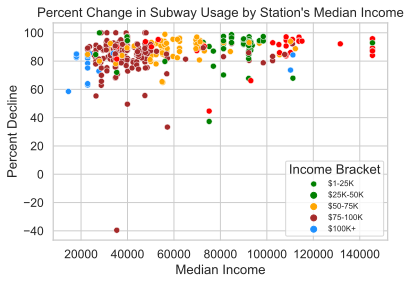

In [197]:
sns.scatterplot(data=station_declines, x='MEDIAN_INCOME', y='PERCENT_DECLINE', hue='INCOME_BRACKET', palette=['green','orange','brown','dodgerblue','red'], legend=True)
#plt.legend(title='Income Bracket', loc = 2, bbox_to_anchor = (1,1), label_order=[3, 2, 1, 0, 4])
# not including legend because colors of brackets are included and could not find a way to order the labels in the legend
# so that the income brackets would display from lowest to highest

plt.legend(labels=['$1-25K', '$25K-50K', '$50-75K', '$75-100K', '$100K+'], prop = {'size': 8}, loc='lower right', title = 'Income Bracket')
plt.xlabel('Median Income')
plt.ylabel('Percent Decline')
plt.title("Percent Change in Subway Usage by Station's Median Income")
plt.savefig('EDA_scatter')

In [147]:
bracket_labels_list = ['< $25K', '$25-50K', '$50-75K', '$75-100K', '> $100']
bracket_declines_list = [bracket1_decline, bracket2_decline, bracket3_decline, bracket4_decline, bracket5_decline]
bracket_declines_list

[82.47159578906039,
 85.38820526049537,
 90.1193639368978,
 92.75013321790387,
 91.37234591132382]

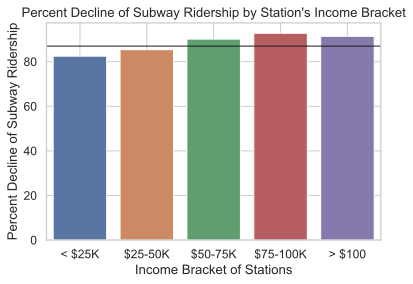

In [195]:
sns.barplot(x=bracket_labels_list, y=bracket_declines_list)
plt.xlabel('Income Bracket of Stations')
plt.ylabel('Percent Decline of Subway Ridership')
plt.grid(axis = 'x')
plt.title("Percent Decline of Subway Ridership by Station's Income Bracket")
plt.axhline(y=87,linewidth=1, color='k')
plt.savefig('EDA_bar_chart')

<AxesSubplot:title={'center':'PERCENT_DECLINE'}, xlabel='INCOME_BRACKET'>

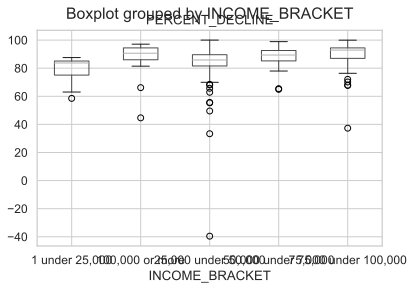

In [149]:
station_declines.boxplot(column = 'PERCENT_DECLINE', by = 'INCOME_BRACKET')

In [150]:
# grouped_stations_march02 = (mta_daily_df.where(mta_daily_df['DATE'] == '03/02/2020')).dropna().groupby(['STATION', 'INCOME_BRACKET', 'DATE'])
# grouped_stations_march02.agg({'DAILY_ENTRIES': np.sum}).head()

## Create data frames for each income bracket

### Bracket 1 ($1 under 25,000)

In [151]:
# create a dataframe for '1 under 25,000' bracket
bracket1_df = mta_daily_df[mta_daily_df['INCOME_BRACKET'] == '1 under 25,000'].copy()
bracket1_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
158143,N203,R195,00-00-00,161/YANKEE STAD,03/01/2020,"1 under 25,000",6343404,02/29/2020,6342966.0,438.0
158144,N203,R195,00-00-00,161/YANKEE STAD,03/02/2020,"1 under 25,000",6344396,03/01/2020,6343404.0,992.0
158145,N203,R195,00-00-00,161/YANKEE STAD,03/03/2020,"1 under 25,000",6345356,03/02/2020,6344396.0,960.0
158146,N203,R195,00-00-00,161/YANKEE STAD,03/04/2020,"1 under 25,000",6346375,03/03/2020,6345356.0,1019.0
158147,N203,R195,00-00-00,161/YANKEE STAD,03/05/2020,"1 under 25,000",6347395,03/04/2020,6346375.0,1020.0


In [152]:
# Another way to create a dataframe from an existing dataframe
# test = pd.DataFrame(mta_daily_df[mta_daily_df['INCOME_BRACKET'] == '1 under 25,000'])
# test.head()

In [153]:
bracket1_df.STATION.nunique()
bracket1_df.STATION.unique()

array(['161/YANKEE STAD', '167 ST', 'NEWARK C', '116 ST', '125 ST',
       '138/GRAND CONC', '149/GRAND CONC', '3 AV-149 ST', 'JACKSON AV',
       'PROSPECT AV', 'INTERVALE AV', 'SIMPSON ST', 'FREEMAN ST',
       '174 ST', 'WEST FARMS SQ', 'E 180 ST', '3 AV 138 ST', 'BROOK AV',
       'CYPRESS AV', "E 143/ST MARY'S", 'E 149 ST', 'LONGWOOD AV',
       'HUNTS POINT AV', 'WHITLOCK AV'], dtype=object)

In [154]:
bracket1_daily_totals = bracket1_df.groupby(["DATE"])[['DAILY_ENTRIES']].sum().reset_index()

bracket1_daily_totals.head()
# first day of march was sunday
# may want to look at first monday and last monday in set
# when graphing, may want to graph weekly totals over time

,DATE,DAILY_ENTRIES
0,03/01/2020,85729.0
1,03/02/2020,163004.0
2,03/03/2020,150828.0
3,03/04/2020,157760.0
4,03/05/2020,169875.0


In [155]:
bracket1_daily_totals.tail()

,DATE,DAILY_ENTRIES
85,05/25/2020,28572.0
86,05/26/2020,44419.0
87,05/27/2020,45675.0
88,05/28/2020,45080.0
89,05/29/2020,45255.0


In [156]:
# bracket1_march02 = bracket1_daily_totals.iloc[1]['DAILY_ENTRIES'] # first monday of time period
# bracket1_may25 = bracket1_daily_totals.iloc[85]['DAILY_ENTRIES'] # last monday of time period

# bracket1_march02
# bracket1_may25

bracket1_march02 = bracket1_daily_totals.iloc[1]['DAILY_ENTRIES']
bracket1_may25 = bracket1_daily_totals.iloc[85]['DAILY_ENTRIES']

bracket1_march02
bracket1_may25

28572.0

In [157]:
bracket1_decline = ((bracket1_march02 - bracket1_may25) / bracket1_march02) * 100
bracket1_decline

82.47159578906039

### Bracket 2 ($25,000 under 50,000)

In [158]:
# create a dataframe for '25,000 under 50,000' bracket
bracket2_df = mta_daily_df[mta_daily_df['INCOME_BRACKET'] == '25,000 under 50,000'].copy()
bracket2_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
24403,A061,R142,00-00-00,DELANCEY/ESSEX,03/01/2020,"25,000 under 50,000",13853213,02/29/2020,13851606.0,1607.0
24404,A061,R142,00-00-00,DELANCEY/ESSEX,03/02/2020,"25,000 under 50,000",13856112,03/01/2020,13853213.0,2899.0
24405,A061,R142,00-00-00,DELANCEY/ESSEX,03/03/2020,"25,000 under 50,000",13859161,03/02/2020,13856112.0,3049.0
24406,A061,R142,00-00-00,DELANCEY/ESSEX,03/04/2020,"25,000 under 50,000",13862234,03/03/2020,13859161.0,3073.0
24407,A061,R142,00-00-00,DELANCEY/ESSEX,03/05/2020,"25,000 under 50,000",13864793,03/04/2020,13862234.0,2559.0


In [159]:
bracket2_df.STATION.nunique()
bracket2_df.STATION.unique()

array(['DELANCEY/ESSEX', 'BOWERY', 'BOTANIC GARDEN', 'PROSPECT PARK',
       'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD', 'CORTELYOU RD',
       'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J', 'AVENUE M', 'KINGS HWY',
       'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY', 'BRIGHTON BEACH',
       'OCEAN PKWY', '25 ST', '36 ST', '45 ST', '53 ST', '59 ST',
       'BAY RIDGE AV', '8 AV', 'FT HAMILTON PKY', 'NEW UTRECHT AV',
       '18 AV', '20 AV', 'BAY PKWY', '86 ST', '9 AV', '50 ST', '55 ST',
       '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
       'W 8 ST-AQUARIUM', 'BEDFORD AV', 'LORIMER ST', 'GRAHAM AV',
       'GRAND ST', 'MONTROSE AV', 'MORGAN AV', 'JEFFERSON ST',
       'DEKALB AV', 'MYRTLE-WYCKOFF', 'HALSEY ST', 'WILSON AV',
       'BUSHWICK AV', 'ATLANTIC AV', 'SUTTER AV', 'LIVONIA AV',
       'NEW LOTS', 'MARCY AV', 'HEWES ST', 'FLUSHING AV', 'MYRTLE AV',
       'KOSCIUSZKO ST', 'GATES AV', 'CHAUNCEY ST', 'ALABAMA AV',
       'VAN SICLEN AV', 'CLEVELAND ST', 'NORWOOD AV', 'CRESCENT ST

In [160]:
bracket2_daily_totals = bracket2_df.groupby(["DATE"])[['DAILY_ENTRIES']].sum().reset_index()

bracket2_daily_totals.head()

,DATE,DAILY_ENTRIES
0,03/01/2020,875461.0
1,03/02/2020,1492445.0
2,03/03/2020,1414236.0
3,03/04/2020,1431047.0
4,03/05/2020,1394979.0


In [161]:
bracket2_daily_totals.tail()

,DATE,DAILY_ENTRIES
85,05/25/2020,218073.0
86,05/26/2020,341021.0
87,05/27/2020,365972.0
88,05/28/2020,342300.0
89,05/29/2020,334915.0


In [162]:
bracket2_march02 = bracket2_daily_totals.iloc[1]['DAILY_ENTRIES']
bracket2_may25 = bracket2_daily_totals.iloc[85]['DAILY_ENTRIES']

bracket2_march02
bracket2_may25

218073.0

In [163]:
((bracket2_march02 - bracket2_may25) / bracket2_march02) * 100

85.38820526049537

In [164]:
bracket2_decline = ((bracket2_march02 - bracket2_may25) / bracket2_march02) * 100
bracket2_decline

85.38820526049537

### Bracket 3 ($50,000 under 75,000)

In [165]:
# create a dataframe for '50,000 under 75,000' bracket
bracket3_df = mta_daily_df[mta_daily_df['INCOME_BRACKET'] == '50,000 under 75,000'].copy()
bracket3_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
6294,A021,R032,01-00-00,TIMES SQ-42 ST,03/01/2020,"50,000 under 75,000",9639845,02/29/2020,9638979.0,866.0
6295,A021,R032,01-00-00,TIMES SQ-42 ST,03/02/2020,"50,000 under 75,000",9643266,03/01/2020,9639845.0,3421.0
6299,A021,R032,01-00-00,TIMES SQ-42 ST,03/06/2020,"50,000 under 75,000",9657195,03/05/2020,9654014.0,3181.0
6300,A021,R032,01-00-00,TIMES SQ-42 ST,03/07/2020,"50,000 under 75,000",9658587,03/06/2020,9657195.0,1392.0
6301,A021,R032,01-00-00,TIMES SQ-42 ST,03/08/2020,"50,000 under 75,000",9659402,03/07/2020,9658587.0,815.0


In [166]:
bracket3_df.STATION.nunique()
bracket3_df.STATION.unique()

array(['TIMES SQ-42 ST', '34 ST-HERALD SQ', '28 ST', 'CANAL ST',
       'CITY HALL', 'FULTON ST', '7 AV', 'PARK PLACE', 'ATL AV-BARCLAY',
       'UNION ST', '77 ST', '86 ST', 'BAY RIDGE-95 ST', '71 ST',
       'EAST 105 ST', 'CANARSIE-ROCKAW', '75 ST-ELDERTS',
       '85 ST-FOREST PK', 'WOODHAVEN BLVD', '104 ST', '111 ST', '121 ST',
       'HOWARD BCH JFK', 'JFK JAMAICA CT1', 'METROPOLITAN AV', '103 ST',
       '96 ST', '42 ST-PORT AUTH', '34 ST-PENN STA', 'SPRING ST',
       'LAFAYETTE AV', 'CLINTON-WASH AV', '80 ST', '88 ST',
       'ROCKAWAY BLVD', 'AQUEDUCT N.COND', 'AQUEDUCT RACETR',
       'BROAD CHANNEL', 'BEACH 90 ST', 'STEINWAY ST', '46 ST', '67 AV',
       'FOREST HILLS 71', '75 AV', 'KEW GARDENS', 'PARSONS BLVD',
       '169 ST', 'JAMAICA 179 ST', 'GREENPOINT AV', 'NASSAU AV',
       '42 ST-BRYANT PK', 'CARROLL ST', 'SMITH-9 ST', 'JAMAICA VAN WK',
       'JAMAICA CENTER', 'CITY / BUS', 'THIRTY THIRD ST', 'CHAMBERS ST',
       'FRANKLIN ST', 'CATHEDRAL PKWY', 'MARBLE HILL-225

In [167]:
bracket3_daily_totals = bracket3_df.groupby(["DATE"])[['DAILY_ENTRIES']].sum().reset_index()

bracket3_daily_totals.head()

,DATE,DAILY_ENTRIES
0,03/01/2020,540251.0
1,03/02/2020,856959.0
2,03/03/2020,651414.0
3,03/04/2020,643254.0
4,03/05/2020,723746.0


In [168]:
bracket3_daily_totals.tail()

,DATE,DAILY_ENTRIES
85,05/25/2020,84673.0
86,05/26/2020,148814.0
87,05/27/2020,154965.0
88,05/28/2020,152262.0
89,05/29/2020,150988.0


In [169]:
bracket3_march02 = bracket3_daily_totals.iloc[1]['DAILY_ENTRIES']
bracket3_may25 = bracket3_daily_totals.iloc[85]['DAILY_ENTRIES']

bracket3_march02
bracket3_may25

84673.0

In [170]:
bracket3_decline = ((bracket3_march02 - bracket3_may25) / bracket3_march02) * 100
bracket3_decline

90.1193639368978

### Bracket 4 ($75,000 under 100,000)

In [171]:
# create a dataframe for '75,000 under 100,000' bracket
bracket4_df = mta_daily_df[mta_daily_df['INCOME_BRACKET'] == '75,000 under 100,000'].copy()
bracket4_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/01/2020,"75,000 under 100,000",7396077,02/29/2020,7395518.0,559.0
2,A002,R051,02-00-00,59 ST,03/02/2020,"75,000 under 100,000",7397350,03/01/2020,7396077.0,1273.0
3,A002,R051,02-00-00,59 ST,03/03/2020,"75,000 under 100,000",7398638,03/02/2020,7397350.0,1288.0
4,A002,R051,02-00-00,59 ST,03/04/2020,"75,000 under 100,000",7399918,03/03/2020,7398638.0,1280.0
5,A002,R051,02-00-00,59 ST,03/05/2020,"75,000 under 100,000",7401196,03/04/2020,7399918.0,1278.0


In [172]:
bracket4_df.STATION.nunique()
bracket4_df.STATION.unique()

array(['59 ST', '57 ST-7 AV', '49 ST', '23 ST', '14 ST-UNION SQ',
       '8 ST-NYU', 'PRINCE ST', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', '4AV-9 ST', 'PROSPECT AV', '8 AV', '6 AV', '3 AV',
       '1 AV', '50 ST', '14 ST', 'W 4 ST-WASH SQ', 'HIGH ST',
       'HOYT-SCHER', 'BEACH 98 ST', 'BEACH 105 ST', 'ROCKAWAY PARK B',
       '7 AV', '5 AV/53 ST', 'LEXINGTON AV/53', "B'WAY-LAFAYETTE",
       'YORK ST', 'BERGEN ST', '4 AV-9 ST', '15 ST-PROSPECT', '57 ST',
       'GROVE STREET', 'EXCHANGE PLACE', 'CHRISTOPHER ST', '9TH STREET',
       '14TH STREET', 'TWENTY THIRD ST', 'THIRTY ST', 'HOUSTON ST',
       '18 ST', 'SPRING ST', 'BLEECKER ST', 'ASTOR PL', '28 ST', '33 ST',
       '51 ST', 'CLARK ST', 'HOYT ST', 'NEVINS ST', 'RIT-MANHATTAN'],
      dtype=object)

In [173]:
bracket4_daily_totals = bracket4_df.groupby(["DATE"])[['DAILY_ENTRIES']].sum().reset_index()

bracket4_daily_totals.head()

,DATE,DAILY_ENTRIES
0,03/01/2020,450405.0
1,03/02/2020,639929.0
2,03/03/2020,450414.0
3,03/04/2020,363020.0
4,03/05/2020,368889.0


In [174]:
bracket4_daily_totals.tail()

,DATE,DAILY_ENTRIES
85,05/25/2020,46394.0
86,05/26/2020,135097.0
87,05/27/2020,86720.0
88,05/28/2020,99781.0
89,05/29/2020,85534.0


In [175]:
bracket4_march02 = bracket4_daily_totals.iloc[1]['DAILY_ENTRIES']
bracket4_may25 = bracket4_daily_totals.iloc[85]['DAILY_ENTRIES']

bracket4_march02
bracket4_may25

46394.0

In [176]:
bracket4_decline = ((bracket4_march02 - bracket4_may25) / bracket4_march02) * 100
bracket4_decline

92.75013321790387

### Bracket 5 ($100,000 or more)

In [177]:
# create a dataframe for '$100,000 or more' bracket
bracket5_df = mta_daily_df[mta_daily_df['INCOME_BRACKET'] == '100,000 or more'].copy()
bracket5_df.head()

,CA,UNIT,SCP,STATION,DATE,INCOME_BRACKET,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1062,A006,R079,00-00-00,5 AV/59 ST,03/01/2020,"100,000 or more",4266624,02/29/2020,4265886.0,738.0
1063,A006,R079,00-00-00,5 AV/59 ST,03/02/2020,"100,000 or more",4268004,03/01/2020,4266624.0,1380.0
1064,A006,R079,00-00-00,5 AV/59 ST,03/03/2020,"100,000 or more",4269522,03/02/2020,4268004.0,1518.0
1065,A006,R079,00-00-00,5 AV/59 ST,03/04/2020,"100,000 or more",4271142,03/03/2020,4269522.0,1620.0
1066,A006,R079,00-00-00,5 AV/59 ST,03/05/2020,"100,000 or more",4272712,03/04/2020,4271142.0,1570.0


In [178]:
bracket5_df.STATION.nunique()
bracket5_df.STATION.unique()

array(['5 AV/59 ST', 'CORTLANDT ST', 'RECTOR ST', 'WHITEHALL S-FRY',
       'CHAMBERS ST', 'BROAD ST', '86 ST', '81 ST-MUSEUM', '72 ST',
       '59 ST COLUMBUS', 'WORLD TRADE CTR', '47-50 STS ROCK',
       'LEXINGTON AV/63', 'ROOSEVELT ISLND', '72 ST-2 AVE', '86 ST-2 AVE',
       '96 ST-2 AVE', 'HARRISON', 'PAVONIA/NEWPORT', 'PATH WTC 2',
       'PATH NEW WTC', 'SOUTH FERRY', 'WTC-CORTLANDT', 'WALL ST',
       'PARK PLACE', '66 ST-LINCOLN', '79 ST', 'BOWLING GREEN',
       'BROOKLYN BRIDGE', 'GRD CNTRL-42 ST', '68ST-HUNTER CO', '77 ST',
       'RIT-ROOSEVELT'], dtype=object)

In [179]:
bracket5_daily_totals = bracket5_df.groupby(["DATE"])[['DAILY_ENTRIES']].sum().reset_index()

bracket5_daily_totals.head()

,DATE,DAILY_ENTRIES
0,03/01/2020,300028.0
1,03/02/2020,442148.0
2,03/03/2020,248974.0
3,03/04/2020,250472.0
4,03/05/2020,305929.0


In [180]:
bracket5_daily_totals.tail()

,DATE,DAILY_ENTRIES
85,05/25/2020,38147.0
86,05/26/2020,70995.0
87,05/27/2020,73743.0
88,05/28/2020,72984.0
89,05/29/2020,72345.0


In [181]:
bracket5_march02 = bracket5_daily_totals.iloc[1]['DAILY_ENTRIES']
bracket5_may25 = bracket5_daily_totals.iloc[85]['DAILY_ENTRIES']

bracket5_march02
bracket5_may25

38147.0

In [182]:
bracket5_decline = ((bracket5_march02 - bracket5_may25) / bracket5_march02) * 100
bracket5_decline

91.37234591132382

In [183]:
# overall decline for all stations in MTA
all_mta_march02 = mta_daily_df.iloc[1]['DAILY_ENTRIES']
all_mta_may25 = mta_daily_df.iloc[85]['DAILY_ENTRIES']

all_mta_decline = ((all_mta_march02 - all_mta_may25) / all_mta_march02) * 100
all_mta_decline

86.80282796543598

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

Text(0.5, 1.0, 'Daily Entries for Stations in Each Income Bracket')

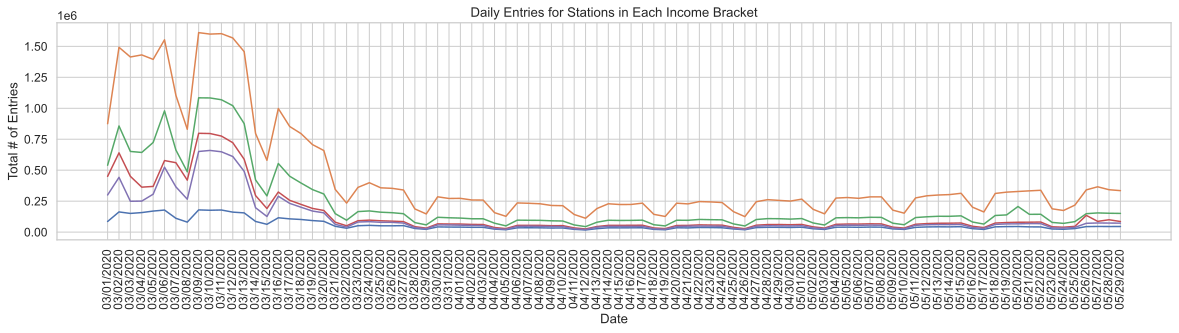

In [185]:
plt.figure(figsize=(20, 4))
plt.plot(bracket1_daily_totals['DATE'], bracket1_daily_totals['DAILY_ENTRIES'])
plt.plot(bracket2_daily_totals['DATE'], bracket2_daily_totals['DAILY_ENTRIES'])
plt.plot(bracket3_daily_totals['DATE'], bracket3_daily_totals['DAILY_ENTRIES'])
plt.plot(bracket4_daily_totals['DATE'], bracket4_daily_totals['DAILY_ENTRIES'])
plt.plot(bracket5_daily_totals['DATE'], bracket5_daily_totals['DAILY_ENTRIES'])


plt.ylabel('Total # of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for Stations in Each Income Bracket')
# plt.savefig('graph1')

Text(0.5, 1.0, 'Daily Entries for Stations in "$25,000 under 50,000" Income Bracket')

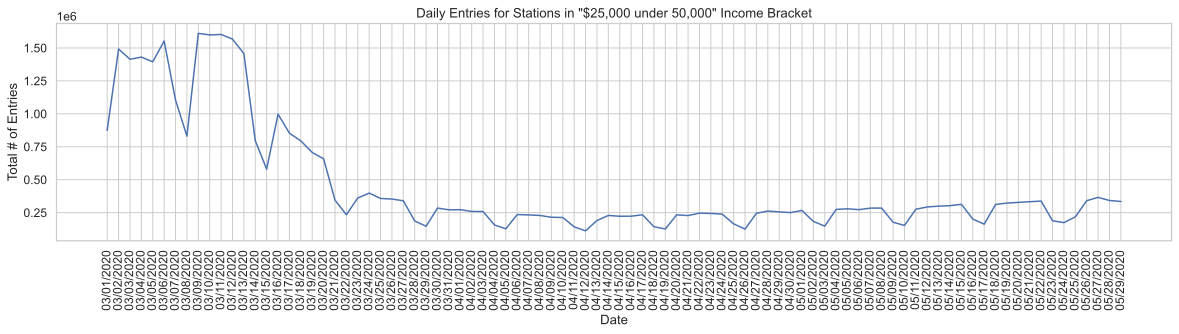

In [186]:
plt.figure(figsize=(20, 4))
plt.plot(bracket2_daily_totals['DATE'], bracket2_daily_totals['DAILY_ENTRIES'])
plt.ylabel('Total # of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for Stations in "$25,000 under 50,000" Income Bracket')


In [187]:
mask = ((bracket1_daily_totals['DATE'] > '03/01/2020') & (bracket1_daily_totals['DATE'] < '05/26/2020'))
bracket1_daily_decline = (bracket1_daily_totals[mask]).copy()
bracket1_daily_decline['PERCENT_CHANGE'] = ((bracket1_daily_totals['DAILY_ENTRIES'].iloc[1] - bracket1_daily_totals['DAILY_ENTRIES']) / bracket1_daily_totals['DAILY_ENTRIES'].iloc[1]) * 100
bracket1_daily_decline


,DATE,DAILY_ENTRIES,PERCENT_CHANGE
1,03/02/2020,163004.0,0.000000
2,03/03/2020,150828.0,7.469755
3,03/04/2020,157760.0,3.217099
4,03/05/2020,169875.0,-4.215234
5,03/06/2020,178171.0,-9.304680
...,...,...,...
81,05/21/2020,42316.0,74.039901
82,05/22/2020,41814.0,74.347869
83,05/23/2020,25174.0,84.556207
84,05/24/2020,22899.0,85.951878


In [188]:
mask = ((bracket2_daily_totals['DATE'] > '03/01/2020') & (bracket2_daily_totals['DATE'] < '05/26/2020'))
bracket2_daily_decline = (bracket2_daily_totals[mask]).copy()
bracket2_daily_decline['PERCENT_CHANGE'] = ((bracket2_daily_totals['DAILY_ENTRIES'].iloc[1] - bracket2_daily_totals['DAILY_ENTRIES']) / bracket2_daily_totals['DAILY_ENTRIES'].iloc[1]) * 100
bracket2_daily_decline

,DATE,DAILY_ENTRIES,PERCENT_CHANGE
1,03/02/2020,1492445.0,0.000000
2,03/03/2020,1414236.0,5.240327
3,03/04/2020,1431047.0,4.113920
4,03/05/2020,1394979.0,6.530626
5,03/06/2020,1553137.0,-4.066616
...,...,...,...
81,05/21/2020,333145.0,77.677904
82,05/22/2020,337782.0,77.367206
83,05/23/2020,188034.0,87.400943
84,05/24/2020,174543.0,88.304896


In [189]:
mask = ((bracket3_daily_totals['DATE'] > '03/01/2020') & (bracket3_daily_totals['DATE'] < '05/26/2020'))
bracket3_daily_decline = (bracket3_daily_totals[mask]).copy()
bracket3_daily_decline['PERCENT_CHANGE'] = ((bracket3_daily_totals['DAILY_ENTRIES'].iloc[1] - bracket3_daily_totals['DAILY_ENTRIES']) / bracket3_daily_totals['DAILY_ENTRIES'].iloc[1]) * 100
bracket3_daily_decline

,DATE,DAILY_ENTRIES,PERCENT_CHANGE
1,03/02/2020,856959.0,0.000000
2,03/03/2020,651414.0,23.985395
3,03/04/2020,643254.0,24.937599
4,03/05/2020,723746.0,15.544851
5,03/06/2020,979324.0,-14.278980
...,...,...,...
81,05/21/2020,143445.0,83.261160
82,05/22/2020,144074.0,83.187760
83,05/23/2020,78203.0,90.874359
84,05/24/2020,70474.0,91.776269


In [190]:
mask = ((bracket4_daily_totals['DATE'] > '03/01/2020') & (bracket4_daily_totals['DATE'] < '05/26/2020'))
bracket4_daily_decline = (bracket4_daily_totals[mask]).copy()
bracket4_daily_decline['PERCENT_CHANGE'] = ((bracket4_daily_totals['DAILY_ENTRIES'].iloc[1] - bracket4_daily_totals['DAILY_ENTRIES']) / bracket4_daily_totals['DAILY_ENTRIES'].iloc[1]) * 100
bracket4_daily_decline

,DATE,DAILY_ENTRIES,PERCENT_CHANGE
1,03/02/2020,639929.0,0.000000
2,03/03/2020,450414.0,29.615004
3,03/04/2020,363020.0,43.271832
4,03/05/2020,368889.0,42.354699
5,03/06/2020,577720.0,9.721235
...,...,...,...
81,05/21/2020,80033.0,87.493456
82,05/22/2020,81182.0,87.313905
83,05/23/2020,42830.0,93.307070
84,05/24/2020,39519.0,93.824471


In [191]:
mask = ((bracket5_daily_totals['DATE'] > '03/01/2020') & (bracket5_daily_totals['DATE'] < '05/26/2020'))
bracket5_daily_decline = (bracket5_daily_totals[mask]).copy()
bracket5_daily_decline['PERCENT_CHANGE'] = ((bracket5_daily_totals['DAILY_ENTRIES'].iloc[1] - bracket5_daily_totals['DAILY_ENTRIES']) / bracket5_daily_totals['DAILY_ENTRIES'].iloc[1]) * 100
bracket5_daily_decline

,DATE,DAILY_ENTRIES,PERCENT_CHANGE
1,03/02/2020,442148.0,0.000000
2,03/03/2020,248974.0,43.689896
3,03/04/2020,250472.0,43.351095
4,03/05/2020,305929.0,30.808462
5,03/06/2020,524358.0,-18.593322
...,...,...,...
81,05/21/2020,68829.0,84.433041
82,05/22/2020,68437.0,84.521699
83,05/23/2020,34033.0,92.302804
84,05/24/2020,32403.0,92.671458


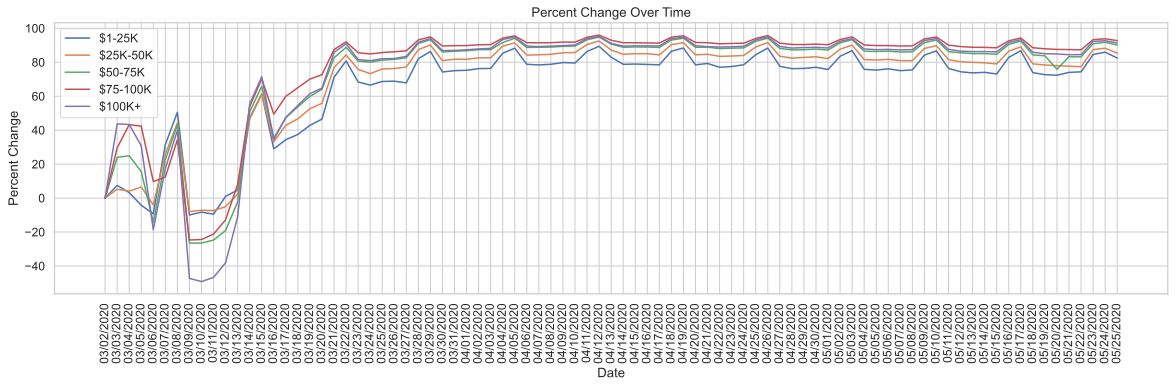

In [196]:
plt.figure(figsize=(20, 5))
plt.plot(bracket1_daily_decline['DATE'], bracket1_daily_decline['PERCENT_CHANGE'])
plt.ylabel('Percent Change')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Percent Change Over Time')
# plt.savefig('graph2')

plt.plot(bracket2_daily_decline['DATE'], bracket2_daily_decline['PERCENT_CHANGE'])

plt.plot(bracket3_daily_decline['DATE'], bracket3_daily_decline['PERCENT_CHANGE'])

plt.plot(bracket4_daily_decline['DATE'], bracket4_daily_decline['PERCENT_CHANGE'])

plt.plot(bracket5_daily_decline['DATE'], bracket5_daily_decline['PERCENT_CHANGE'])

plt.grid(linestyle = '-', which = 'minor')

plt.legend(['$1-25K', '$25K-50K', '$50-75K', '$75-100K', '$100K+'], loc = 'best')

plt.savefig('EDA_line_graph')

In [193]:
from scipy import stats

In [194]:
# future work, see if differences in percent changes between income brackets are statistically significant
# sample sizes not the same, so cannot run t-test